In [1]:
import os
import pandas as pd
import string
from datetime import datetime
from os import path
import json
import numpy as np
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
_HOME_ = path.expanduser("~") + "/PHD"

In [5]:
with open(_HOME_ + "/ISPRA_20152017_Analysis/params.json") as file: 
    params = json.load(file)
best_path = params["best_path"]
best_path_sard = params["best_path_sard"]
ordered_regions = params["ordered_regions"]
seasons = params["seasons"]
sorted_season = params["sorted_season"]
sea_index = params["sea_index"]
ordered_id = params["ordered_id"]
sea_index_array = np.array(list(sea_index.values()))
del params

## Analysis of cluster results

In [6]:
env_long = pd.read_csv(_HOME_ + "/ISPRA_20152017_Analysis/Create_dataset/df_chem_phys_mod_data_cleaned_long_format.csv", index_col=[0, 1, 2])

In [7]:
cluster_index = pd.read_csv(_HOME_ + "/ISPRA_20152017_Analysis/Clustering/Results/cluster_index.csv")

In [8]:
cluster_index["Date"] = pd.to_datetime(cluster_index["Date"])

In [9]:
env_long["Date"] = pd.to_datetime(env_long["Date"])

In [10]:
env_long = pd.merge(cluster_index, env_long, on=["id", "Date"], how="inner")

In [11]:
selected_nutrients = ["T", "Salinity", "O_sat", "pH", "Chla", "NO3", "NH4", "NO2", "TN", "PO4", "TP","SiO4"]

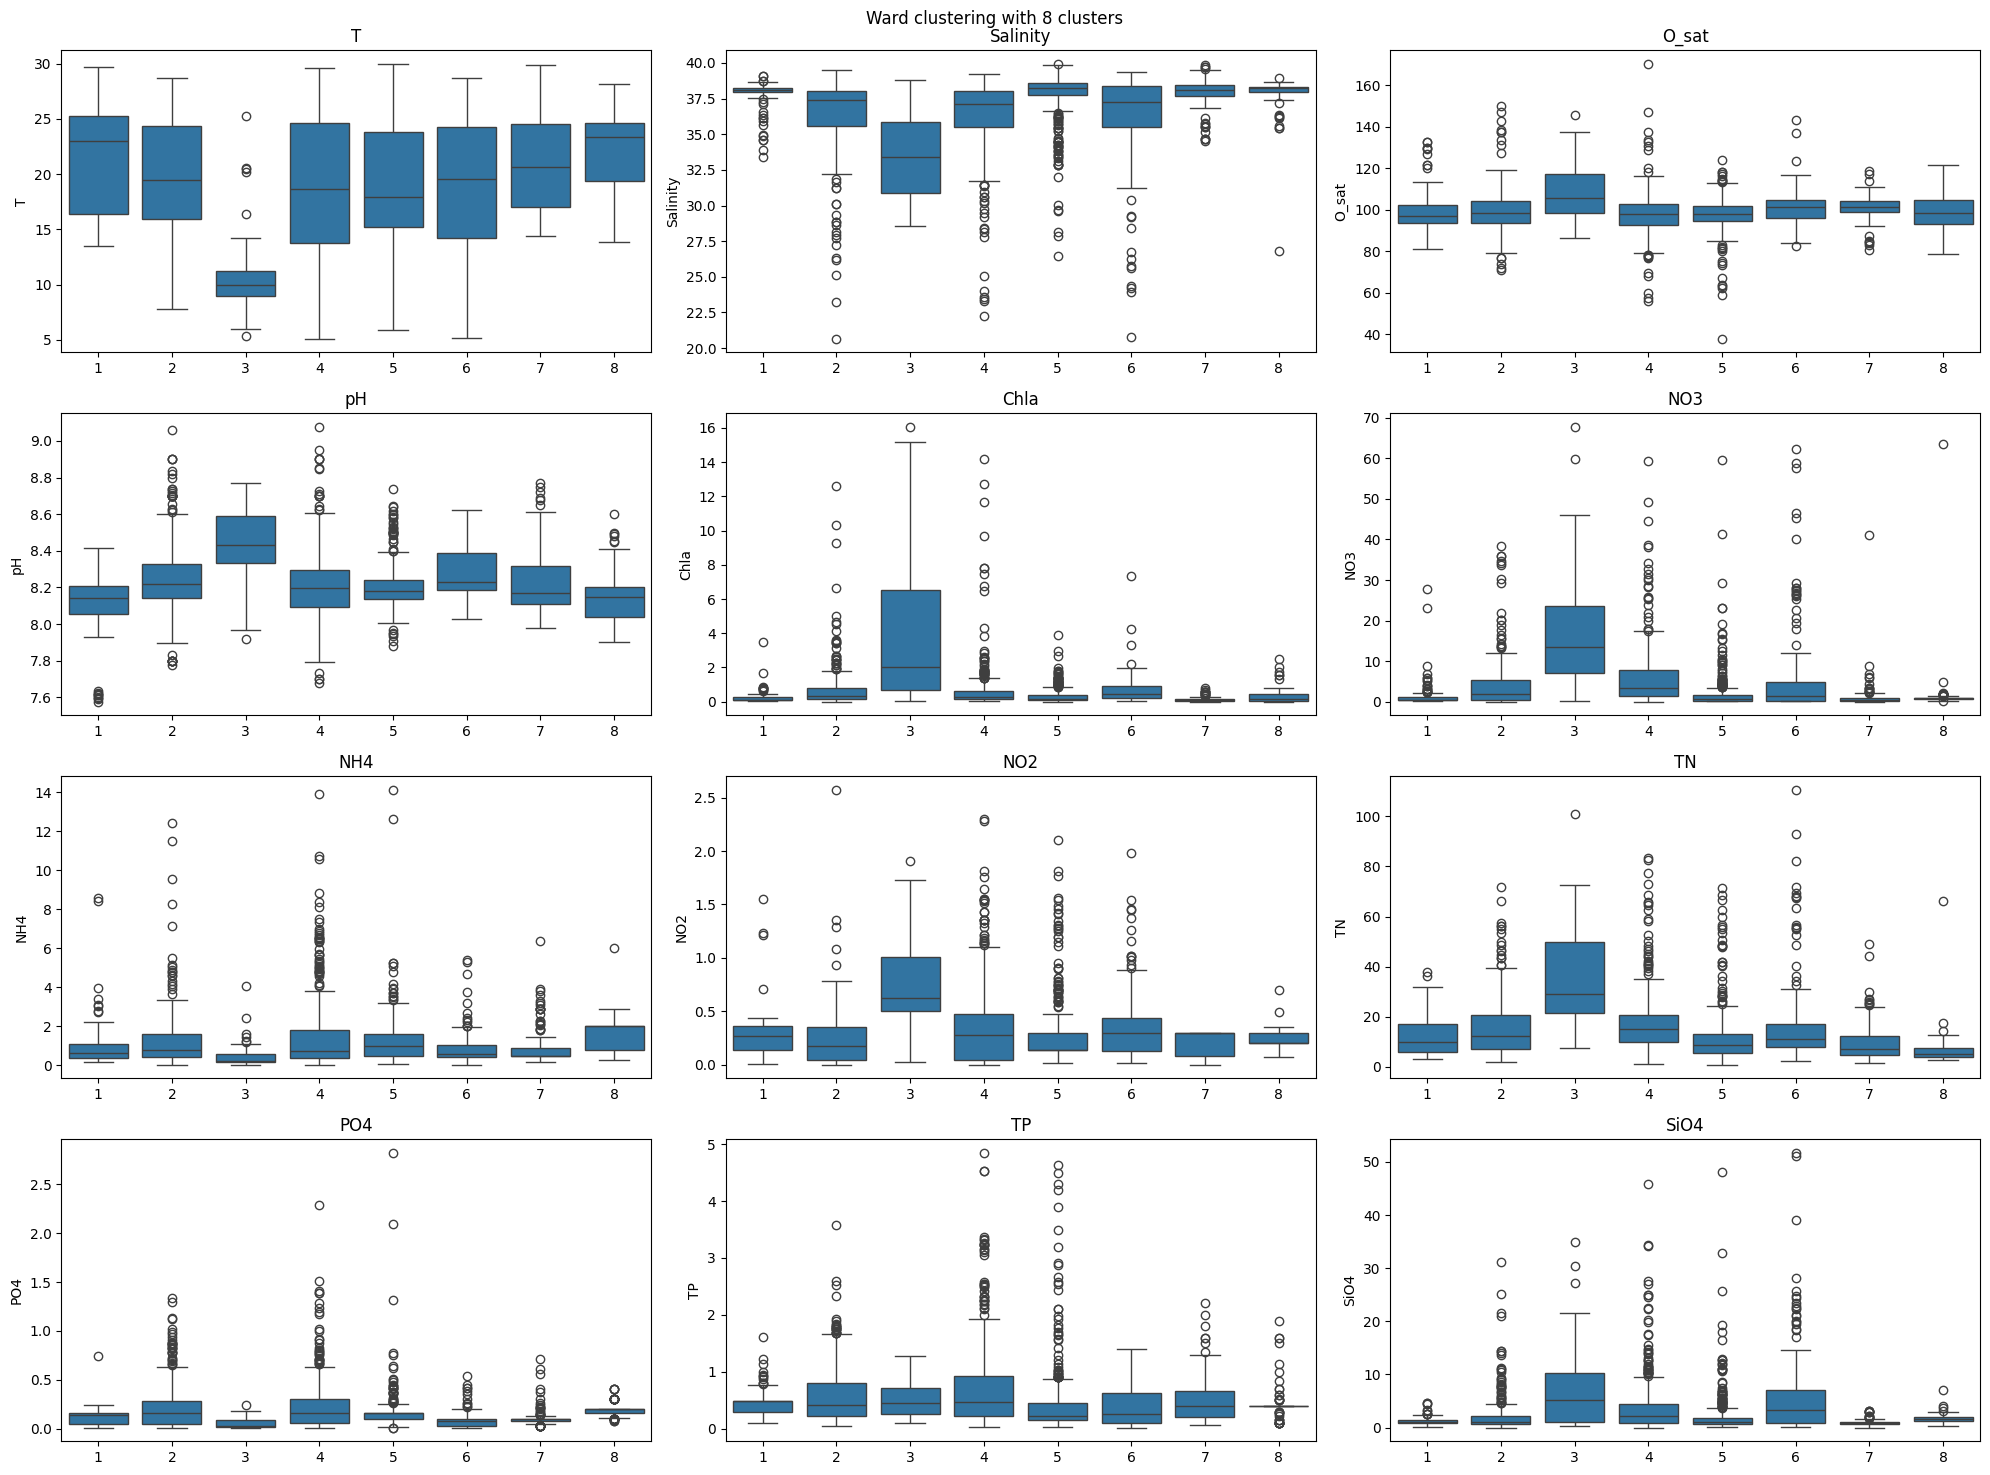

In [11]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
axs = axs.ravel()
cluster_method = "ward_8"
for (nut, ax) in zip(selected_nutrients, axs):
    sns.boxplot(
        data=env_long, 
        y=nut, 
        x = cluster_method,
        legend = False,
        ax=ax)
    ax.set_xlabel("")
    ax.set_title(nut)
plt.suptitle(f"Ward clustering with {cluster_method.split('_')[-1]} clusters")
plt.tight_layout()

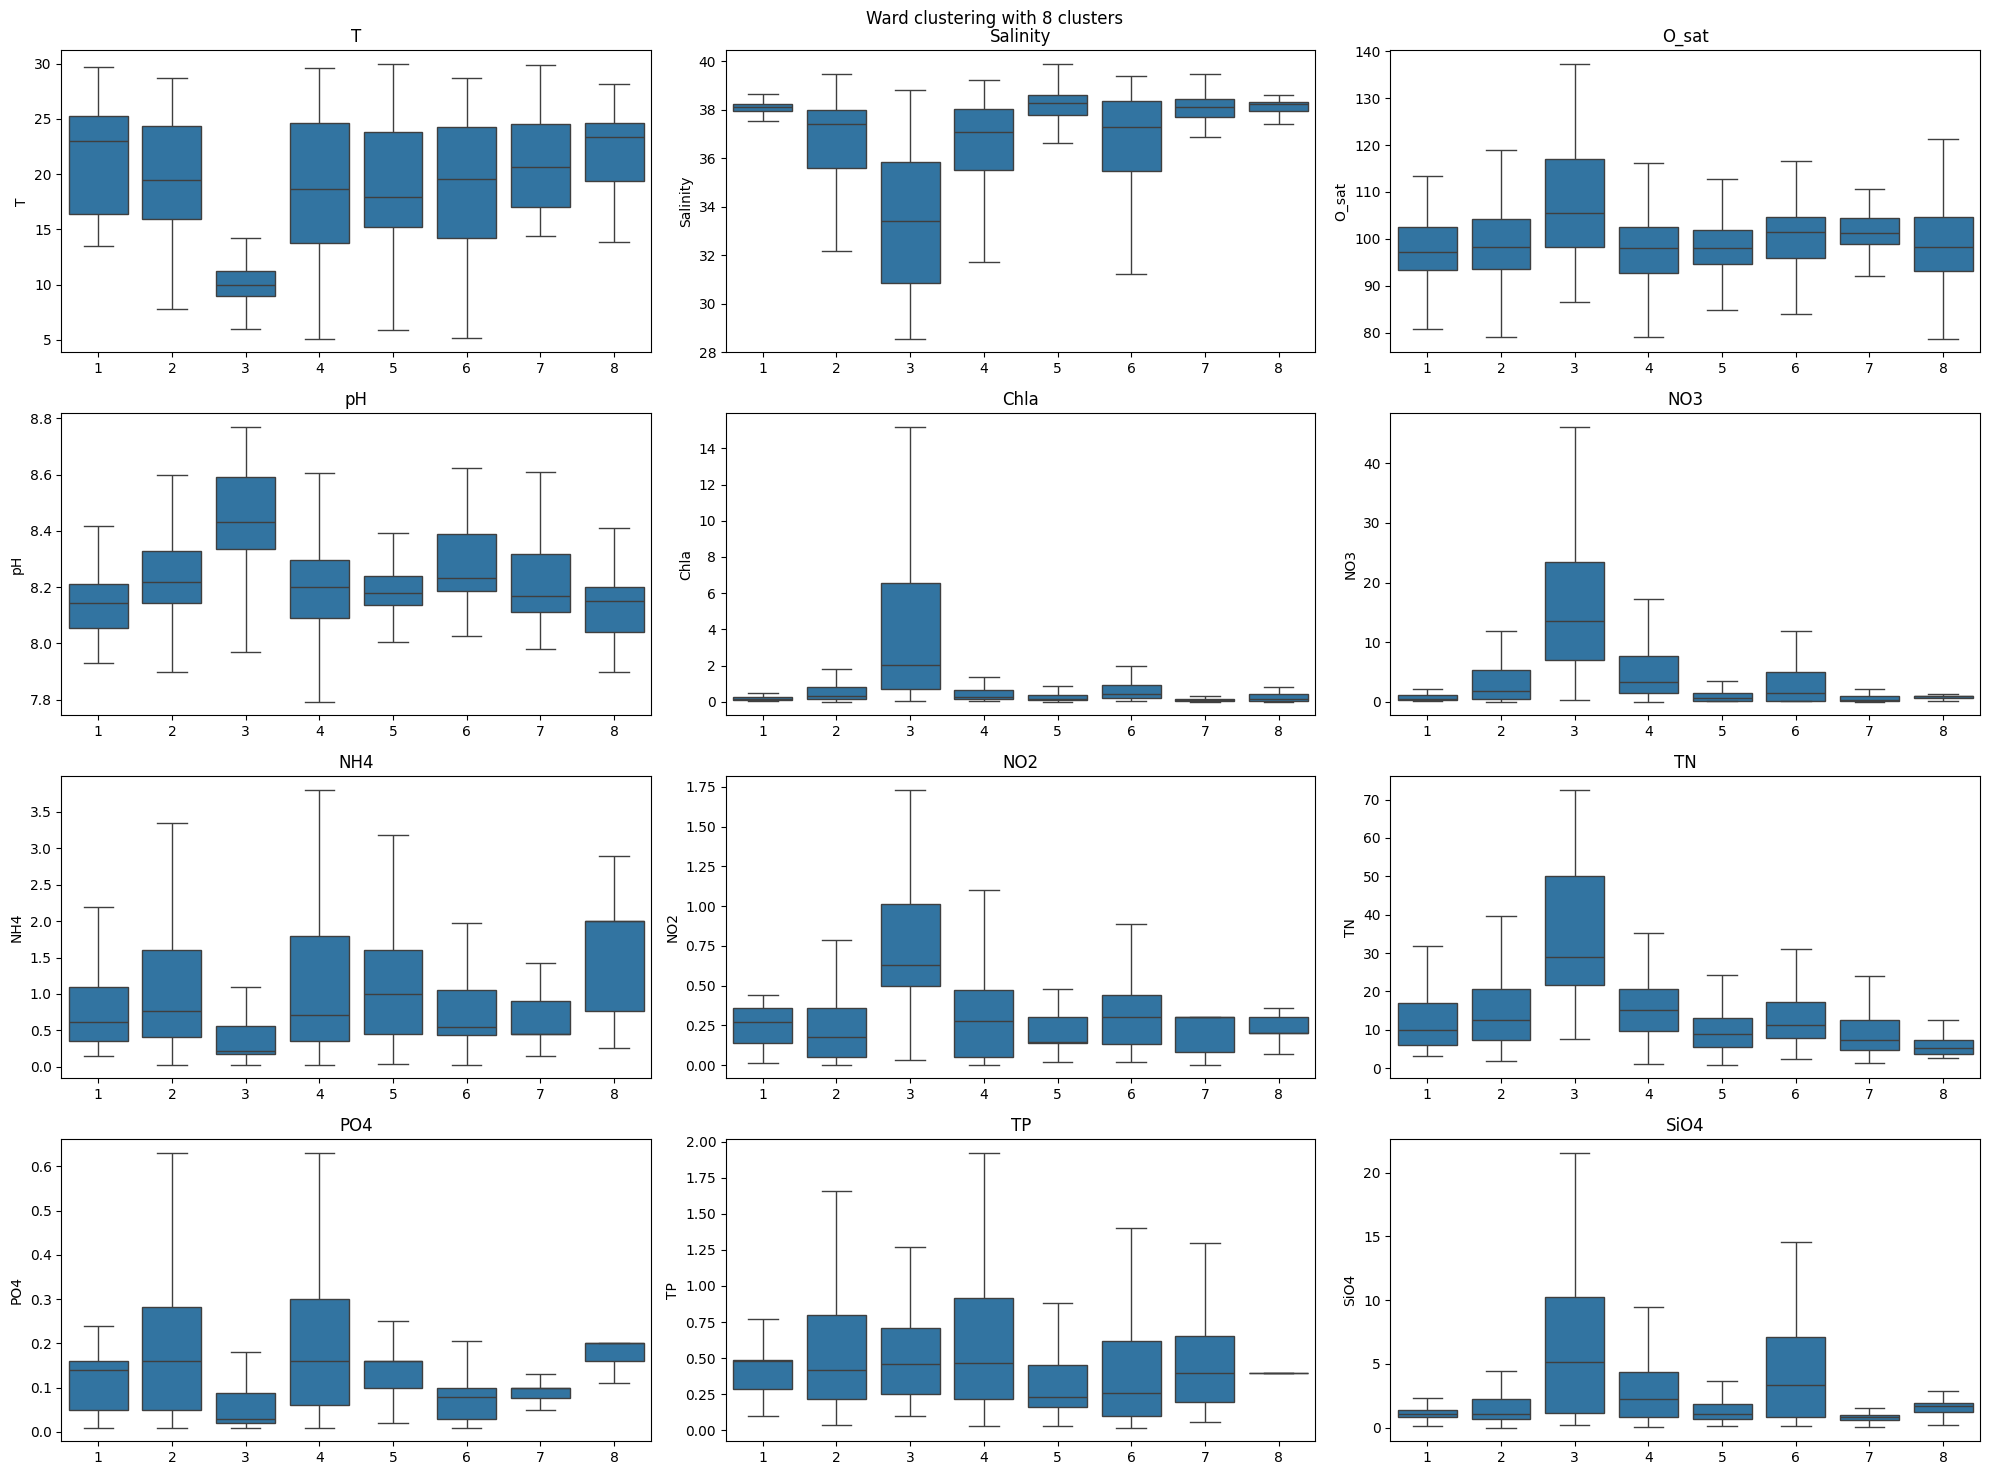

In [12]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
axs = axs.ravel()
cluster_method = "ward_8"
for (nut, ax) in zip(selected_nutrients, axs):
    sns.boxplot(
        data=env_long, 
        y=nut, 
        x = cluster_method,
        legend = False,
        showfliers = False,
        ax=ax)
    ax.set_xlabel("")
    ax.set_title(nut)
plt.suptitle(f"Ward clustering with {cluster_method.split('_')[-1]} clusters")
plt.tight_layout()
#plt.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Clustering/Results/boxplot_chem_phys_cluster.png", bbox_inches="tight")

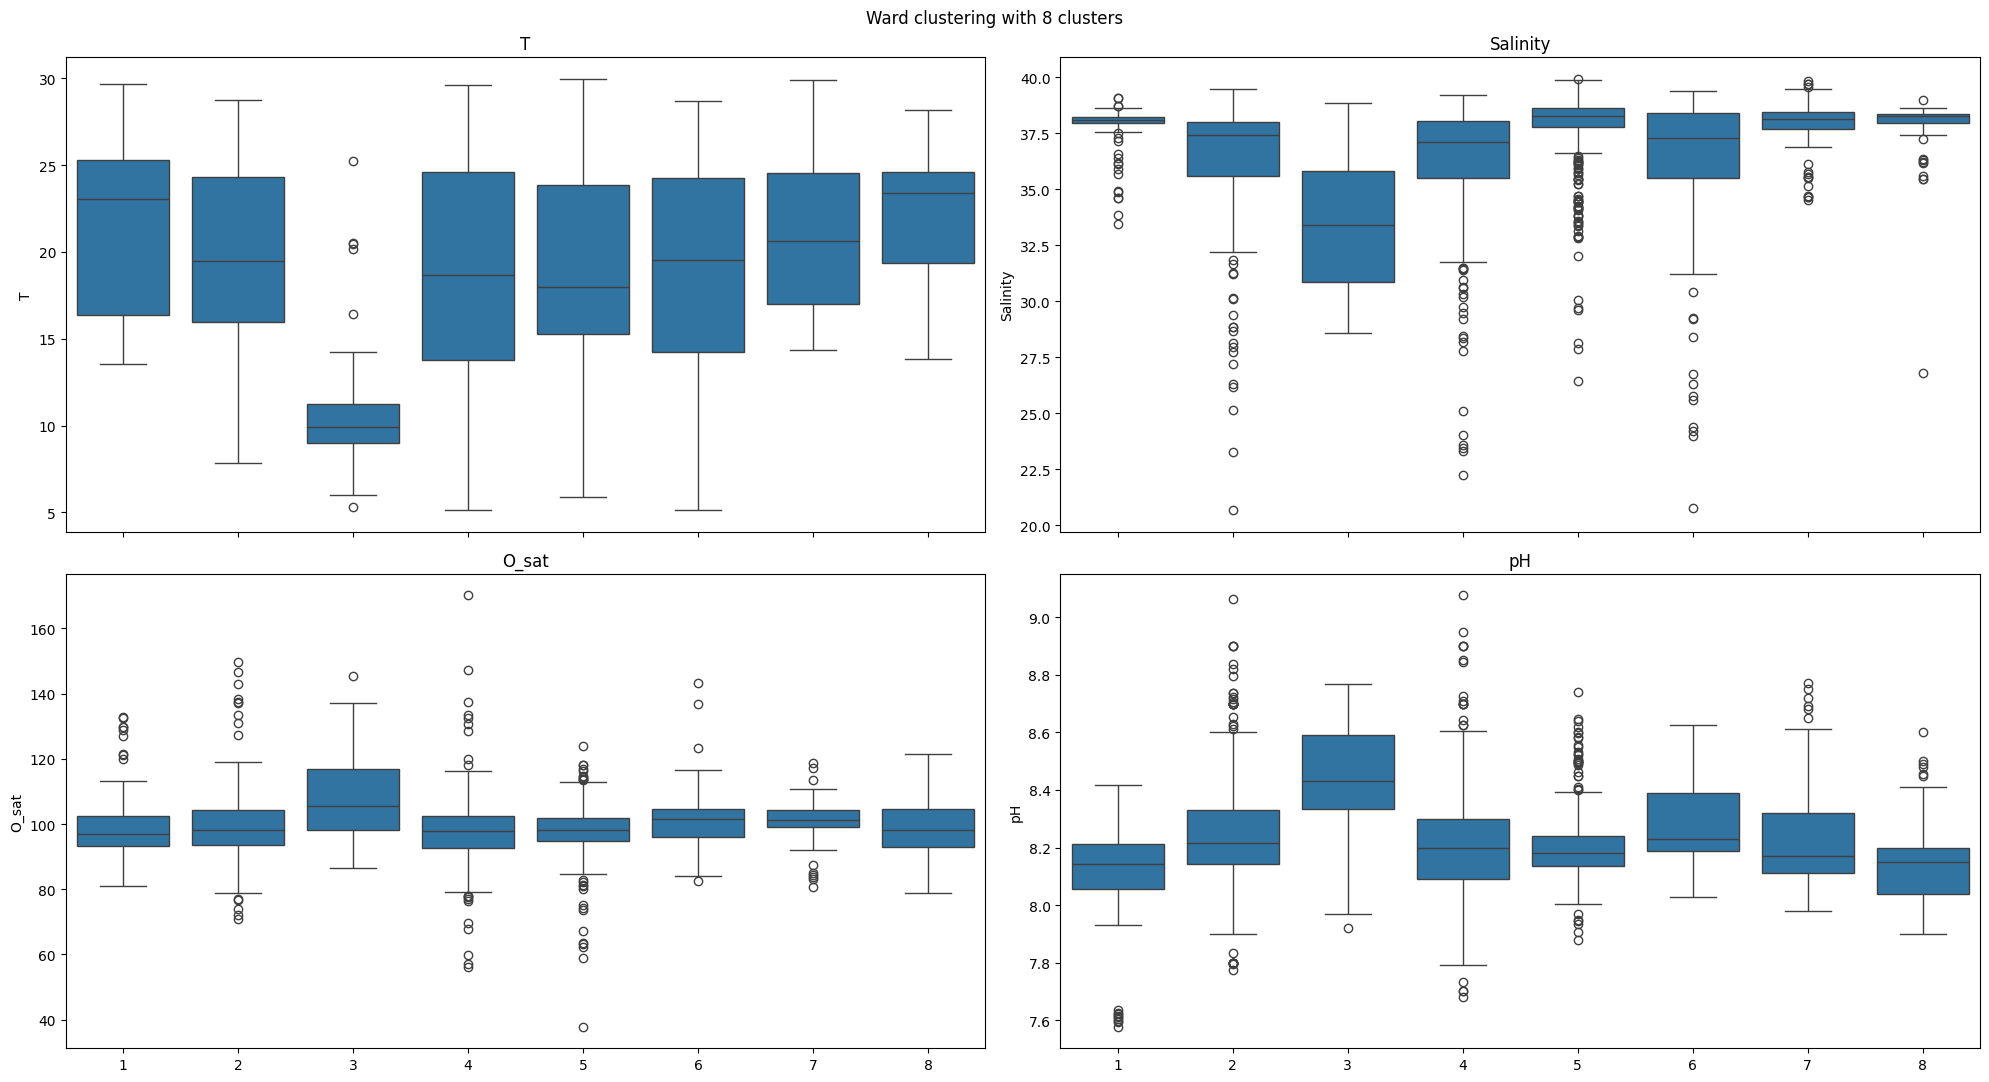

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 11), sharex = True)
axs = axs.ravel()
cluster_method = "ward_8"
for (nut, ax) in zip(selected_nutrients[:4], axs):
    sns.boxplot(
        data=env_long, 
        y=nut, 
        x = cluster_method,
        legend = False,
        ax=ax)
    ax.set_xlabel("")
    ax.set_title(nut)
plt.suptitle(f"Ward clustering with {cluster_method.split('_')[-1]} clusters")
plt.tight_layout()
plt.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Clustering/Results/boxplot_phys_cluster_ward_8.png", bbox_inches="tight")

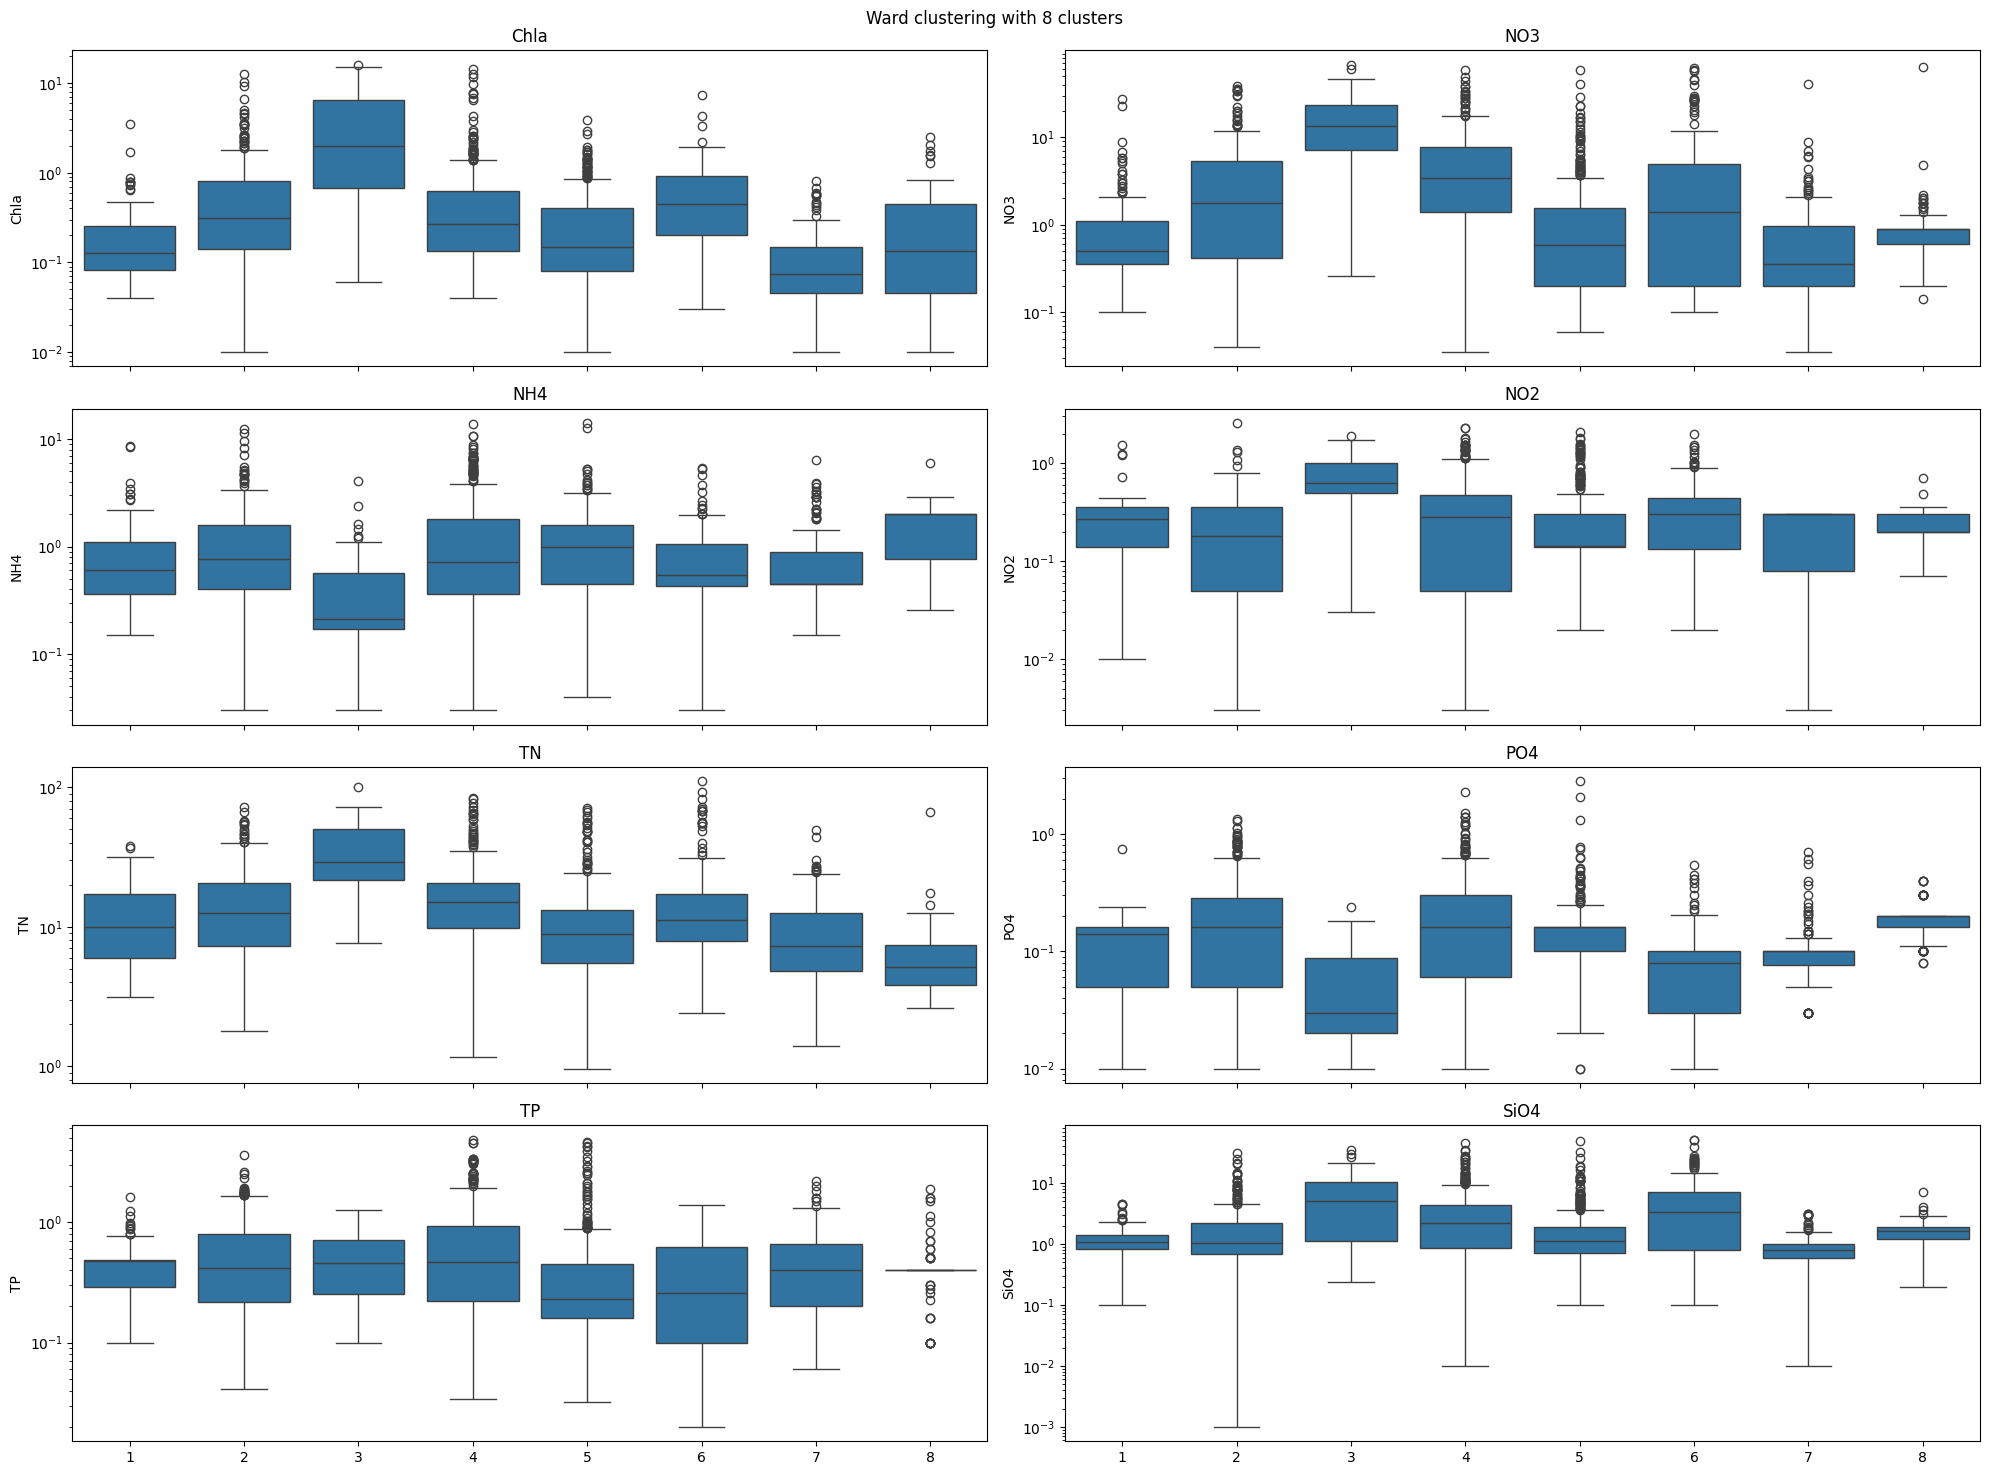

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(20, 15), sharex = True)
axs = axs.ravel()
cluster_method = "ward_8"
for (nut, ax) in zip(selected_nutrients[4:], axs):
    sns.boxplot(
        data=env_long, 
        y=nut, 
        x = cluster_method,
        legend = False,
        ax=ax)
    ax.set_yscale("log")
    ax.set_xlabel("")
    ax.set_title(nut)
plt.suptitle(f"Ward clustering with {cluster_method.split('_')[-1]} clusters")
plt.tight_layout()
plt.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Clustering/Results/boxplot_chem_cluster_ward_8.png", bbox_inches="tight")

level with respect to quantile

In [19]:
quantiles = {}
for nutreint in selected_nutrients:
    quantiles[nutreint] = env_long[nutreint].quantile([0.2, 0.4, 0.6, 0.8, 1]).to_numpy()

In [20]:
quantiles["T"]

array([14.53595   , 17.27769   , 20.910455  , 24.93731333, 29.97133333])

In [16]:
expression = dict(
    (nutrient, "median") for nutrient in selected_nutrients
)
medians = env_long.groupby("ward_8").agg(expression)

In [31]:
def which_range(x, quantiles):
    if x < quantiles[0]:
       return "low"
    elif x < quantiles[1]:
         return "mid-low"
    elif x < quantiles[2]:
        return "mid"
    elif x < quantiles[3]:
        return "mid-high"
    else:
        return "high"

In [33]:
ranges = pd.DataFrame(
    columns= medians.columns,
)
for column in medians.columns:
    ranges[column] = medians[column].apply(which_range, args=(quantiles[column],))

In [35]:
ranges.T

ward_8,1,2,3,4,5,6,7,8
T,mid-high,mid,low,mid,mid,mid,mid,mid-high
Salinity,mid-high,mid-low,low,mid-low,mid-high,mid-low,mid-high,mid-high
O_sat,mid-low,mid,high,mid,mid,mid-high,mid-high,mid
pH,mid-low,mid,high,mid,mid,mid-high,mid,mid-low
Chla,mid-low,mid-high,high,mid,mid,mid-high,low,mid-low
NO3,mid-low,mid-high,high,mid-high,mid-low,mid,mid-low,mid
NH4,mid-low,mid,low,mid,mid,mid-low,mid-low,high
NO2,mid,mid,high,mid,mid-low,mid-high,mid-high,mid
TN,mid,mid,high,mid-high,mid-low,mid,mid-low,low
PO4,mid,mid-high,low,mid-high,mid-high,mid-low,mid,high


In [15]:
statistic_expr = dict([
    (nut, ["mean", "median", "std", "min", "max"]) for nut in selected_nutrients
])
env_statistics = env_long.groupby("ward_8").agg(statistic_expr)

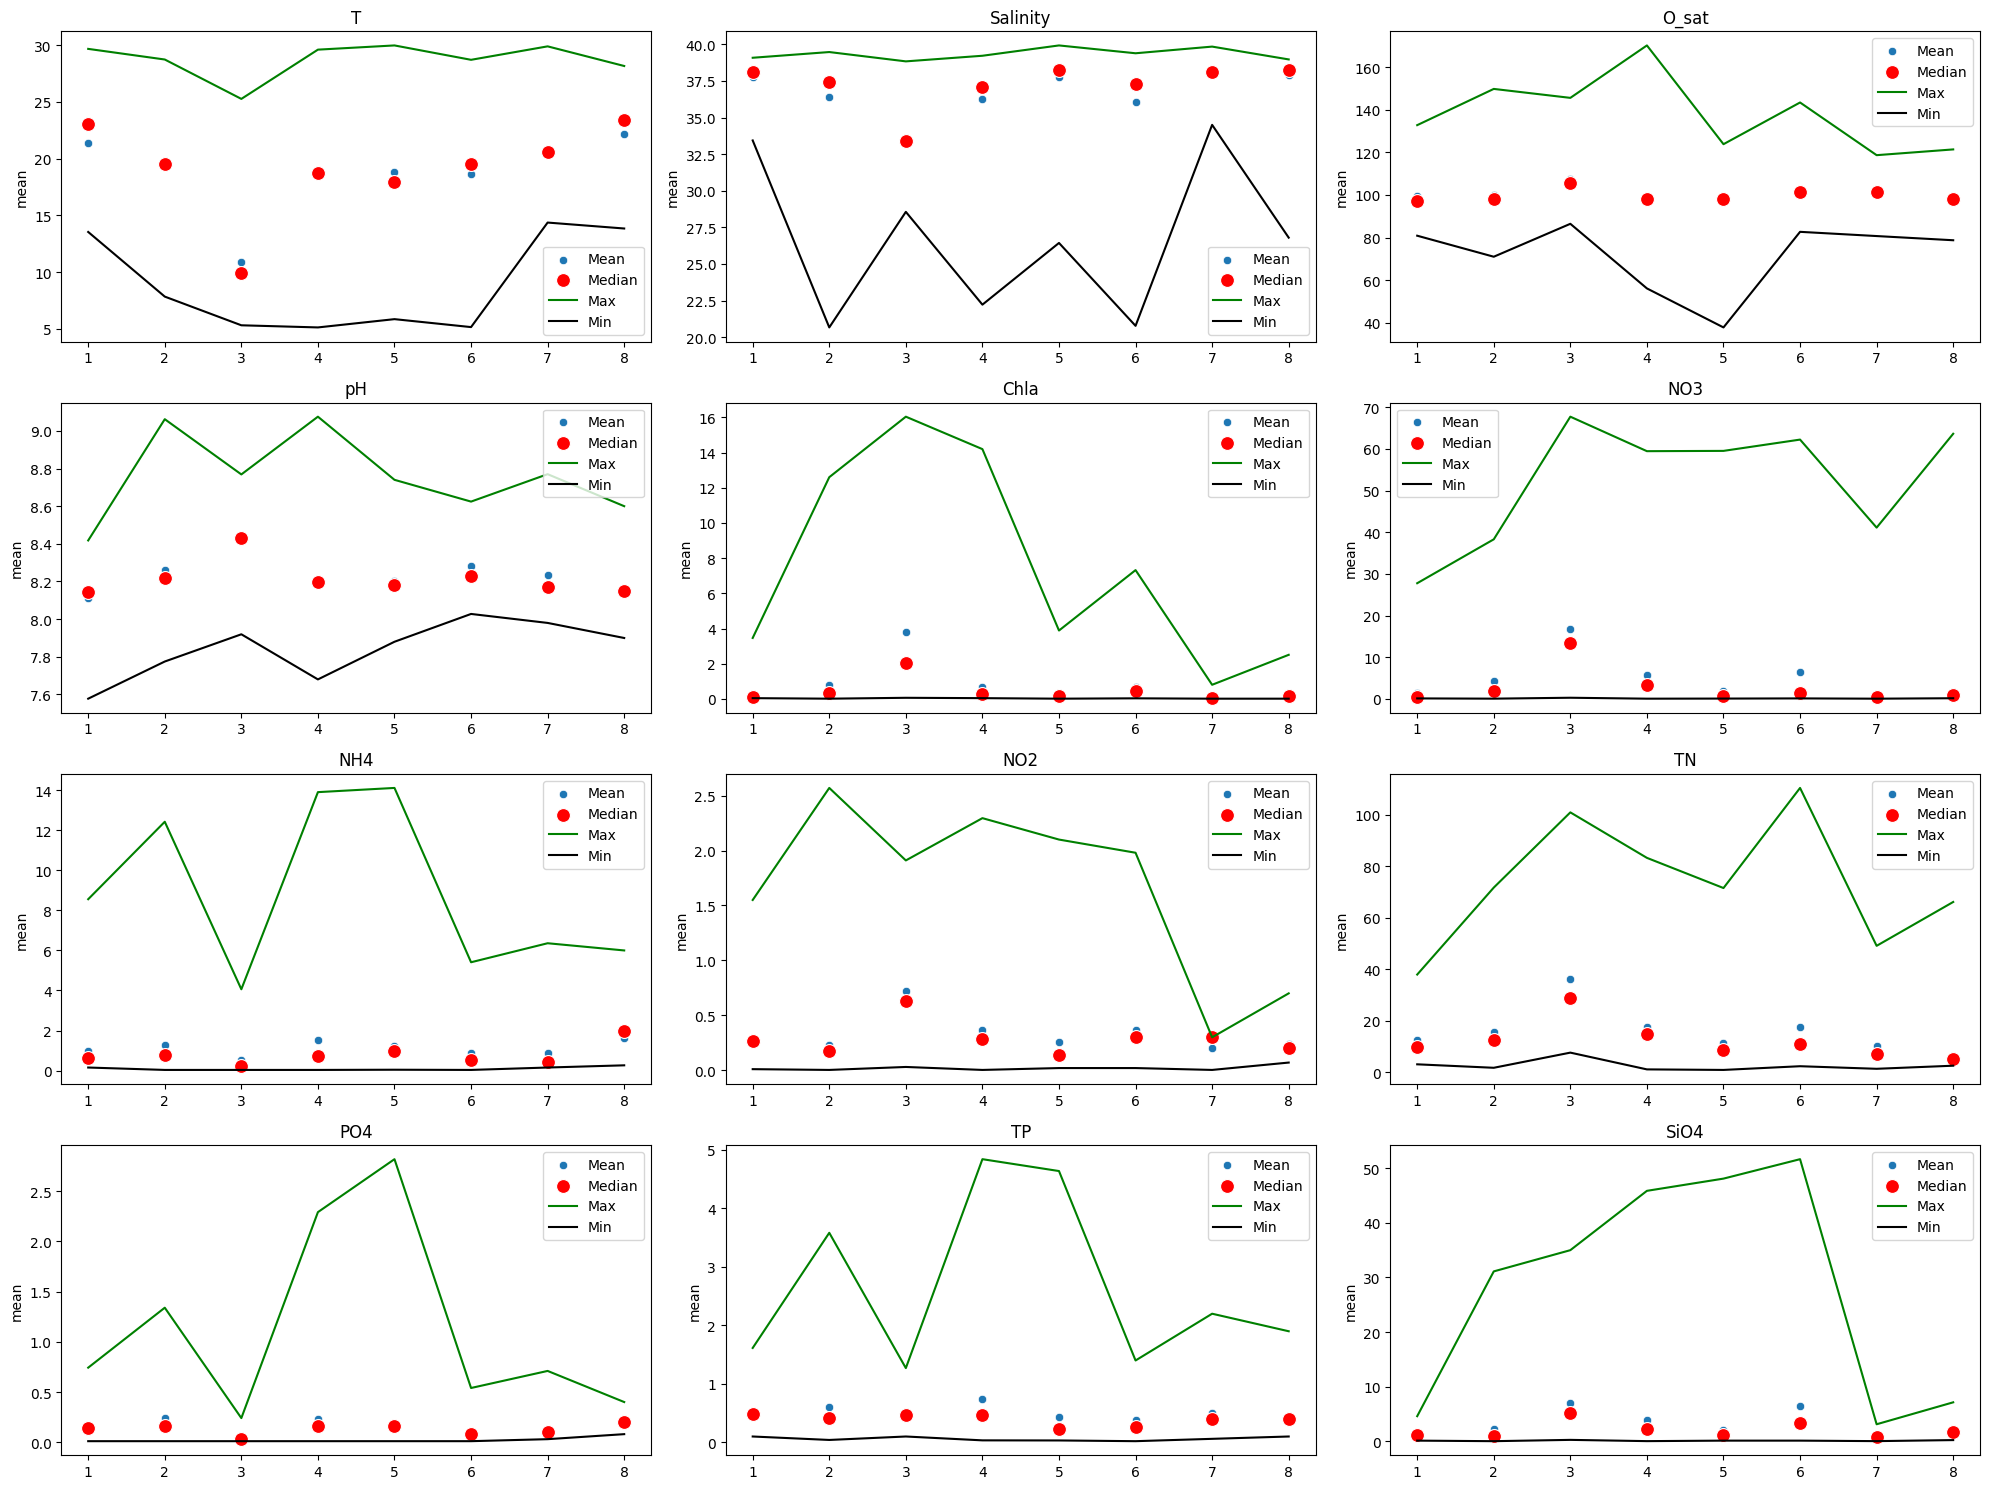

In [17]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
axs = axs.ravel()
for (nut, ax ) in zip(selected_nutrients, axs): 
    sns.scatterplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='mean', marker='o', label='Mean', ax = ax)
    sns.scatterplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='median', color='red', s=100, label='Median', ax = ax)
    sns.lineplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='max', color='green', label='Max', ax = ax)
    sns.lineplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='min', color='black',  label='Min', ax = ax)
    ax.set_title(nut)
    ax.set_xlabel("")
plt.tight_layout()

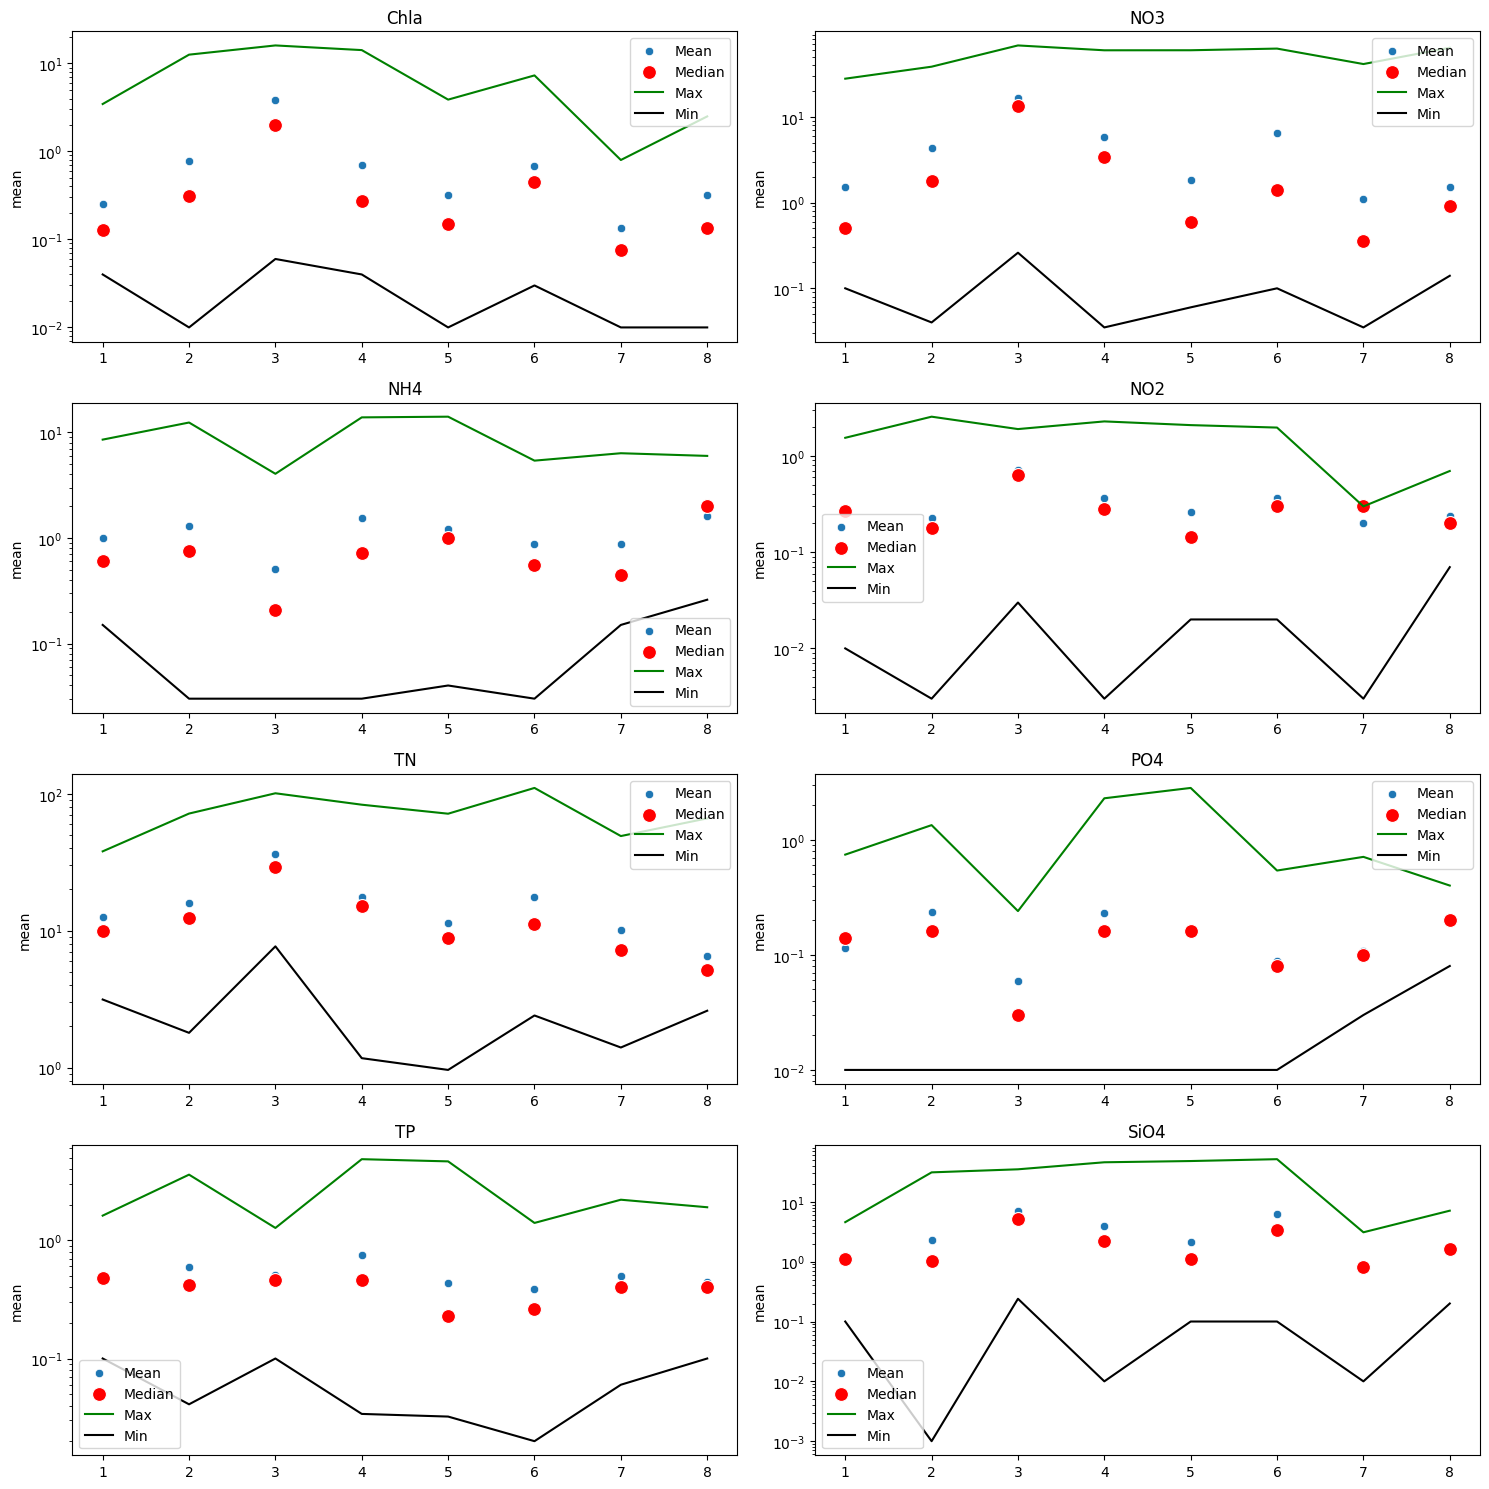

In [22]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
axs = axs.ravel()
for (nut, ax ) in zip(selected_nutrients[4:], axs): 
    sns.scatterplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='mean', marker='o', label='Mean', ax = ax)
    sns.scatterplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='median', color='red', s=100, label='Median', ax = ax)
    sns.lineplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='max', color='green', label='Max', ax = ax)
    sns.lineplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='min', color='black',  label='Min', ax = ax)
    ax.set_title(nut)
    ax.set_yscale("log")
    ax.set_xlabel("")
plt.tight_layout()

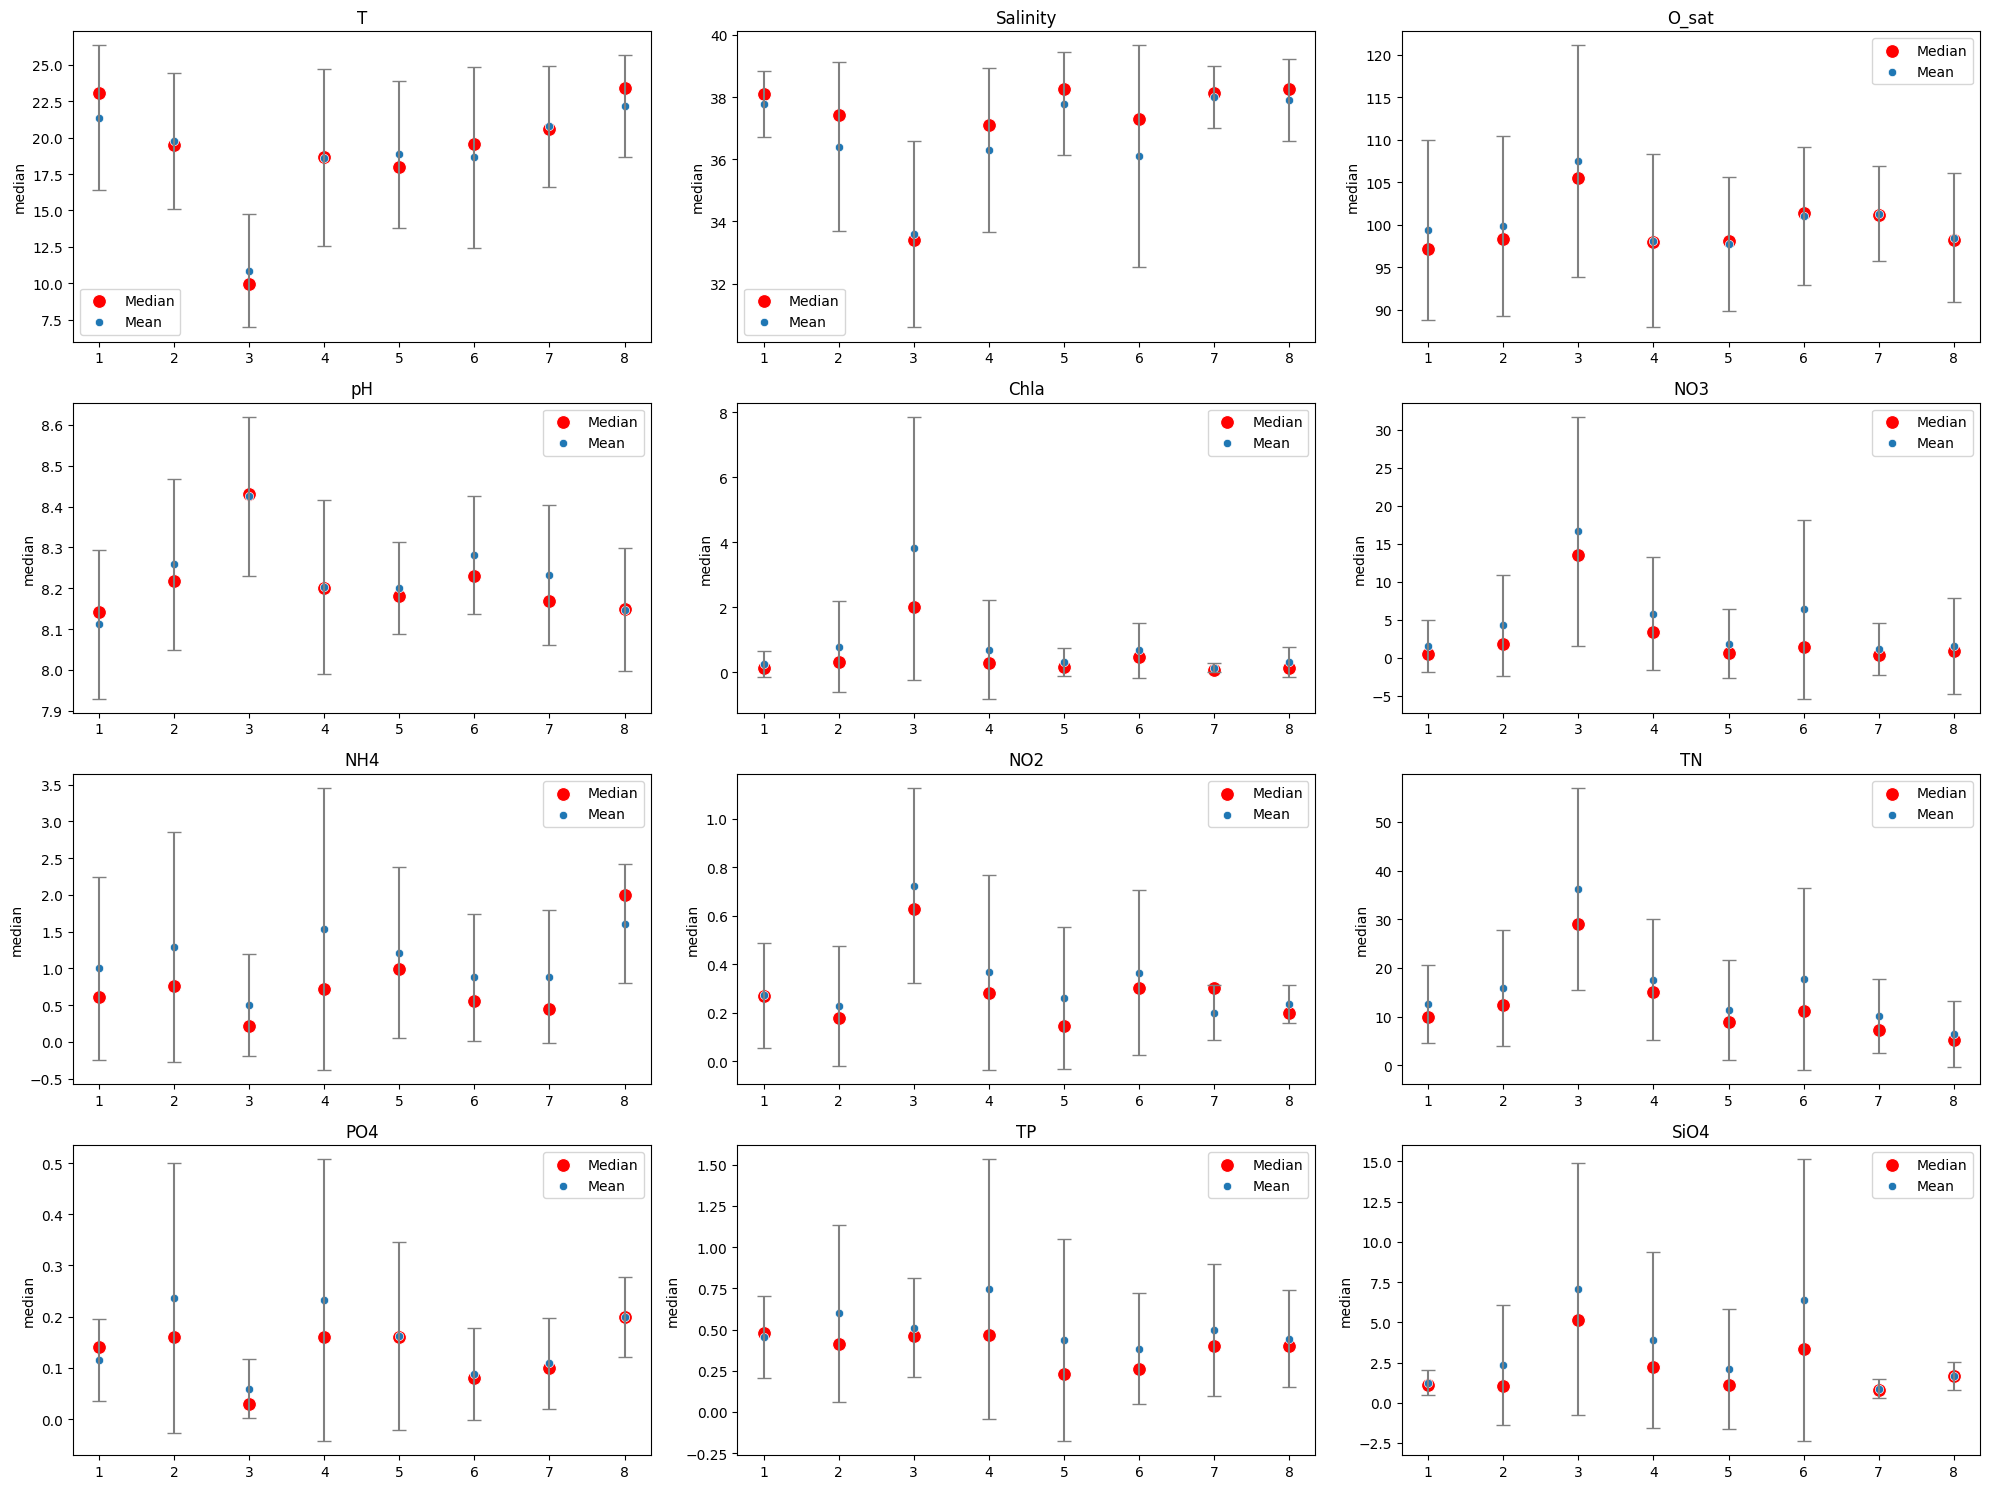

In [18]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
axs = axs.ravel()
for (nut, ax ) in zip(selected_nutrients, axs): 
    sns.scatterplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='median', color='red', s=100, label='Median', ax = ax)
    sns.scatterplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='mean', marker='o', label='Mean', ax = ax)
    ax.errorbar(x=env_statistics.loc[:, nut].index, y=env_statistics.loc[:, nut]['mean'], yerr=env_statistics.loc[:, nut]['std'], fmt='none', capsize=5, color='gray')
    ax.set_title(nut)
    ax.set_xlabel("")
plt.tight_layout()

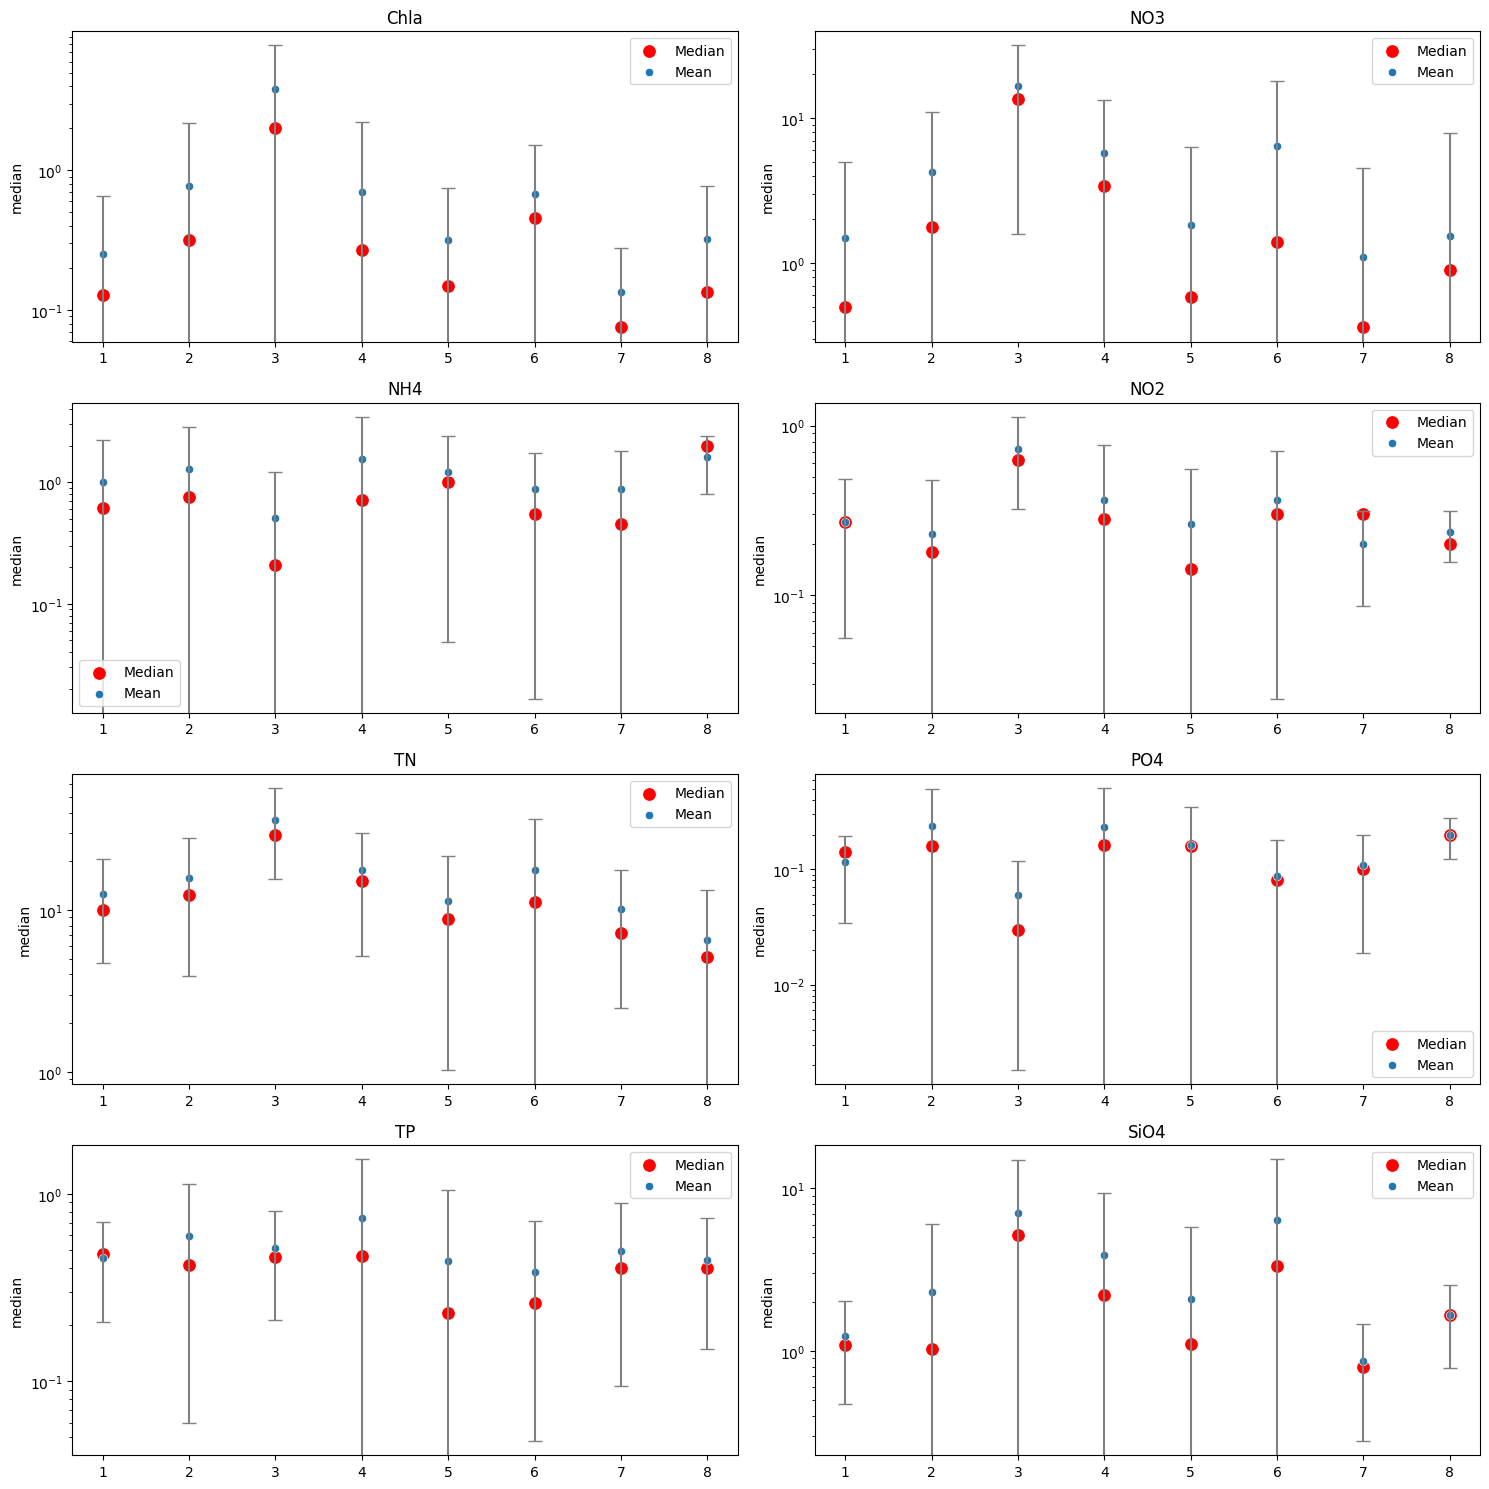

In [23]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
axs = axs.ravel()
for (nut, ax ) in zip(selected_nutrients[4:], axs): 
    sns.scatterplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='median', color='red', s=100, label='Median', ax = ax)
    sns.scatterplot(data=env_statistics.loc[:, nut], x=env_statistics.loc[:, nut].index, y='mean', marker='o', label='Mean', ax = ax)
    ax.errorbar(x=env_statistics.loc[:, nut].index, y=env_statistics.loc[:, nut]['mean'], yerr=env_statistics.loc[:, nut]['std'], fmt='none', capsize=5, color='gray')
    ax.set_title(nut)
    ax.set_yscale("log")
    ax.set_xlabel("")
plt.tight_layout()